# Introducción al Clustering: 
# La Importancia de la Distancia en los Métodos de Clustering

En este capítulo, exploraremos en profundidad cómo la elección de la medida de **distancia** influye en los métodos de **clustering**. La distancia es un componente crítico que determina cómo se miden las similitudes o diferencias entre los datos, afectando directamente la formación y la interpretación de los clusters.

## Introducción

El clustering es una técnica de aprendizaje no supervisado que agrupa datos basándose en similitudes intrínsecas. Sin etiquetas o clases predefinidas, el algoritmo depende completamente de la medida de distancia para discernir patrones y estructuras en los datos.

## 1. Rol de la Distancia en Clustering

### 1.1 Definición de Similitud

La distancia cuantifica la similitud o disimilitud entre puntos de datos:

- **Distancia pequeña**: Los puntos son similares.
- **Distancia grande**: Los puntos son disimilares.

### 1.2 Formación de Clusters

Los algoritmos de clustering utilizan la distancia para:

- **Agrupar puntos cercanos**: Crean clusters de puntos que están cerca según la métrica elegida.
- **Separar puntos lejanos**: Distinguen entre diferentes clusters basándose en distancias mayores.


## 2. Métricas de Distancia

En esta sección, exploraremos diferentes métricas de distancia que son fundamentales para algoritmos de clustering. Las distancias definen la similitud entre los puntos, afectando directamente la formación de grupos.

---

### 1. Distancia Euclidiana

La **distancia Euclidiana** mide la línea recta entre dos puntos en un espacio n-dimensional. Es ideal para datos donde el "camino directo" representa bien la similitud.

### Fórmula:
$$
d_{euclidiana} = \sqrt{\sum_{i=1}^n (p_i - q_i)^2}
$$



In [1]:
# Calcular la distancia Euclidiana
from scipy.spatial.distance import euclidean
import numpy as np
import matplotlib.pyplot as plt

point_a = np.array([1, 2])
point_b = np.array([4, 6])
euclidean_distance = euclidean(point_a, point_b)
print(f"Distancia Euclidiana entre A y B: {euclidean_distance:.2f}")

Distancia Euclidiana entre A y B: 5.00


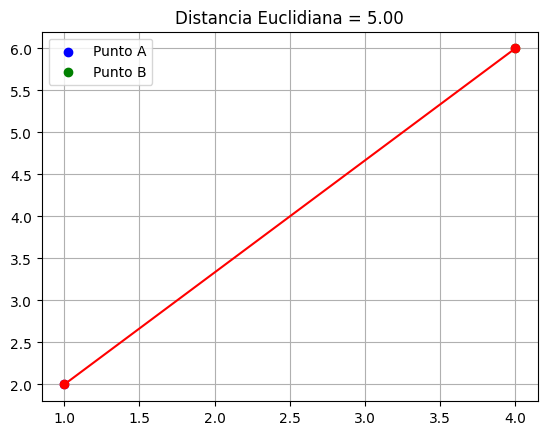

In [2]:
# Gráfica de la Distancia Euclidiana
fig, ax = plt.subplots()
ax.plot([point_a[0], point_b[0]], [point_a[1], point_b[1]], 'ro-')
ax.set_title(f'Distancia Euclidiana = {euclidean_distance:.2f}')
ax.scatter(*point_a, color='blue', label='Punto A')
ax.scatter(*point_b, color='green', label='Punto B')
ax.legend()
ax.grid(True)
plt.show()


### 2. Distancia Manhattan

La **distancia Manhattan** mide la suma de las diferencias absolutas entre las coordenadas, formando una trayectoria en cuadrícula. Es útil en datos donde los movimientos siguen un patrón de cuadriculado (como calles de una ciudad).

### Fórmula:
$$
d_{manhattan} = \sum_{i=1}^n |p_i - q_i|
$$

In [3]:
# Calcular la distancia Manhattan
from scipy.spatial.distance import cityblock

manhattan_distance = cityblock(point_a, point_b)
print(f"Distancia Manhattan entre A y B: {manhattan_distance:.2f}")

Distancia Manhattan entre A y B: 7.00


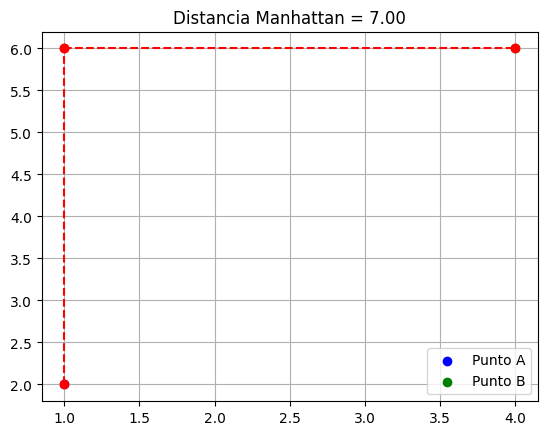

In [4]:
# Gráfica de la Distancia Manhattan
fig, ax = plt.subplots()
ax.plot([point_a[0], point_a[0]], [point_a[1], point_b[1]], 'ro--')
ax.plot([point_a[0], point_b[0]], [point_b[1], point_b[1]], 'ro--')
ax.set_title(f'Distancia Manhattan = {manhattan_distance:.2f}')
ax.scatter(*point_a, color='blue', label='Punto A')
ax.scatter(*point_b, color='green', label='Punto B')
ax.legend()
ax.grid(True)
plt.show()


### 3. Distancia Minkowski

La **distancia Minkowski** es una generalización de las distancias Euclidiana y Manhattan, determinada por el parámetro $ p $.

### Fórmula:
$$
d_{minkowski} = \left( \sum_{i=1}^n |p_i - q_i|^p \right)^{1/p}
$$

In [5]:
# Calcular la distancia Minkowski (ejemplo con p=3)
from scipy.spatial.distance import minkowski

minkowski_distance = minkowski(point_a, point_b, p=3)
print(f"Distancia Minkowski (p=3) entre A y B: {minkowski_distance:.2f}")

Distancia Minkowski (p=3) entre A y B: 4.50


### 4. Distancia Coseno

La **distancia Coseno** mide el ángulo entre dos vectores, ideal para datos donde importa más la orientación que la magnitud.

### Fórmula:
$$
d_{coseno} = 1 - \frac{\sum_{i=1}^n p_i \cdot q_i}{\sqrt{\sum_{i=1}^n p_i^2} \cdot \sqrt{\sum_{i=1}^n q_i^2}}
$$

In [6]:
# Calcular la distancia Coseno
from scipy.spatial.distance import cosine

cosine_distance = cosine(point_a, point_b)
print(f"Distancia Coseno entre A y B: {cosine_distance:.4f}")

Distancia Coseno entre A y B: 0.0077


### Resumen de Distancias

| Distancia   | Valor |
|-------------|-------|
| Euclidiana  | 5.0   |
| Manhattan   | 7.0   |
| Minkowski (p=3) | 4.5 |
| Coseno      | 0.0077 |

## Circunferencias

El siguiente bloque de codigo grafica circunferencias de radio 1 en diferentes distancias.


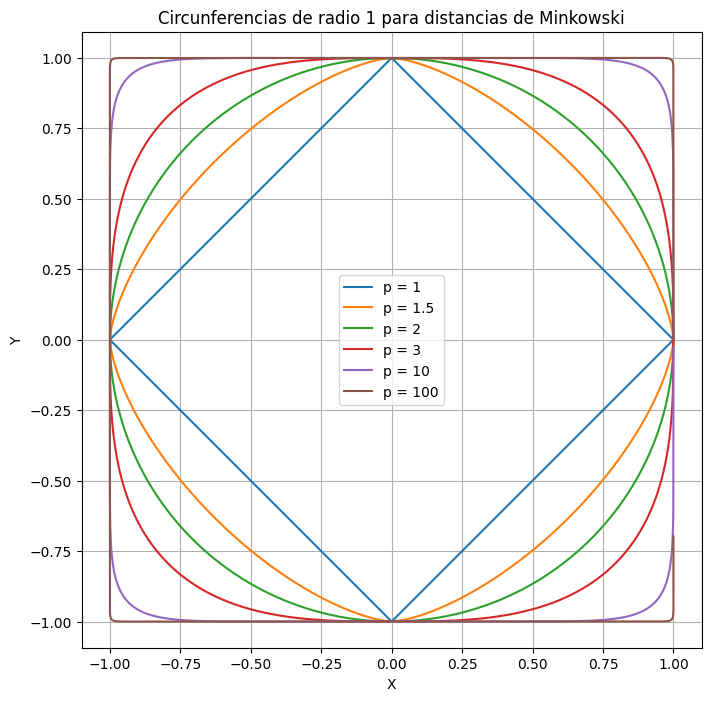

In [7]:
p_values = [1, 1.5, 2, 3, 10,100]
theta = np.linspace(0, 2 * np.pi, 1000)

plt.figure(figsize=(8, 8))

for p in p_values:
    x = np.cos(theta)
    y = np.sin(theta)
    
    # Ajuste para la norma p
    x = np.sign(x) * np.abs(x) ** (1 / p)
    y = np.sign(y) * np.abs(y) ** (1 / p)
    
    # Normalización para cumplir |x|^p + |y|^p = 1
    norm = (np.abs(x) ** p + np.abs(y) ** p) ** (1 / p)
    x_unit = x / norm
    y_unit = y / norm
    
    plt.plot(x_unit, y_unit, label=f'p = {p}')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Circunferencias de radio 1 para distancias de Minkowski')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


# 3. Impacto de la Elección de Distancia

La elección de la métrica de distancia en los algoritmos de clustering es un factor determinante en la formación, estructura y calidad de los clusters obtenidos. En esta sección, profundizaremos en cómo diferentes métricas de distancia pueden influir en los resultados del clustering y en qué aspectos debemos prestar atención al seleccionar una métrica adecuada.

## 3.1 Sensibilidad a la Escala

### 3.1.1 Problema de la Escala

Las variables en los datos pueden tener escalas muy diferentes. Por ejemplo, en un conjunto de datos que incluye altura (en metros) y peso (en kilogramos), los valores numéricos pueden diferir en órdenes de magnitud. Cuando se utilizan métricas de distancia como la Euclidiana o la de Minkowski, las variables con escalas mayores tendrán una influencia desproporcionada en la distancia total.

**Ejemplo:**

Consideremos dos puntos de datos con dos características:

- **Punto A**: $(1, 1000) $
- **Punto B**: $ (2, 2000) $

Calculamos la distancia Euclidiana sin normalizar:

$$
d(A, B) = \sqrt{(2 - 1)^2 + (2000 - 1000)^2} = \sqrt{1 + 1000000} \approx 1000.0005
$$

Observamos que la diferencia en la primera característica es insignificante comparada con la segunda.

### 3.1.2 Solución: Normalización o Estandarización

Para mitigar el problema de la escala, es esencial normalizar o estandarizar las variables antes de aplicar el clustering.

#### Normalización Min-Max

Escala las variables al rango $[0, 1]$:

$$
x_{\text{norm}} = \frac{x - x_{\min}}{x_{\max} - x_{\min}}
$$

#### Estandarización (Z-score)

Convierte las variables a una distribución con media 0 y desviación estándar 1:

$$
z = \frac{x - \mu}{\sigma}
$$

**Ejemplo en Python:**

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

# Datos de ejemplo
X = np.array([[1, 1000], [2, 2000], [3, 3000]])

# Normalización Min-Max
min_max_scaler = MinMaxScaler()
X_norm = min_max_scaler.fit_transform(X)

print("Datos normalizados:")
print(X_norm)

# Estandarización Z-score
standard_scaler = StandardScaler()
X_std = standard_scaler.fit_transform(X)

print("\nDatos estandarizados:")
print(X_std)

Datos normalizados:
[[0.  0. ]
 [0.5 0.5]
 [1.  1. ]]

Datos estandarizados:
[[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]


**Impacto en la Distancia:**

Al normalizar o estandarizar, cada variable contribuye de manera equitativa a la distancia total, evitando que variables con mayor escala dominen el cálculo.

### 3.1.3 Visualización del Efecto de la Normalización

Para ilustrar el efecto de la normalización en el clustering, consideremos un conjunto de datos antes y después de la normalización.

**Código de Ejemplo:**

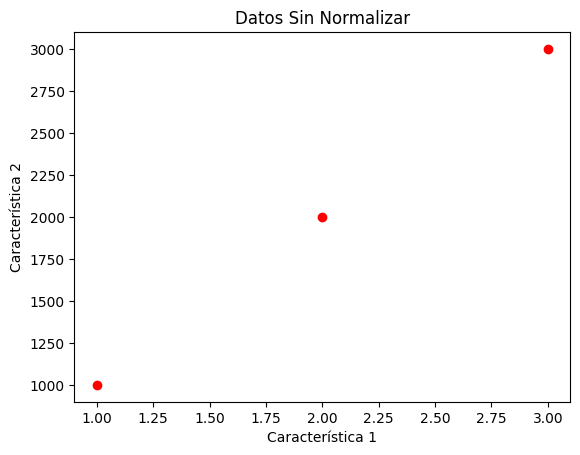

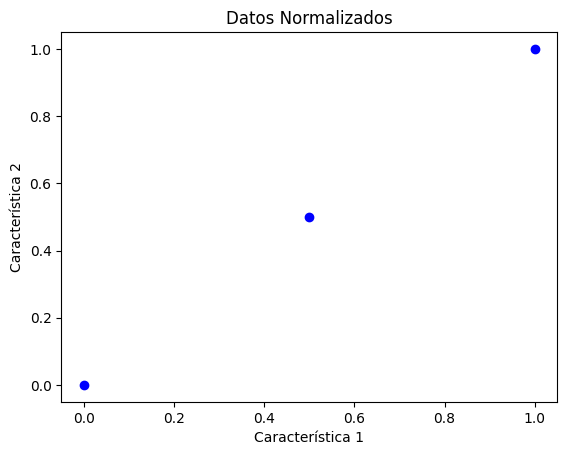

In [9]:
import matplotlib.pyplot as plt

# Datos sin normalizar
plt.scatter(X[:, 0], X[:, 1], color='red')
plt.title('Datos Sin Normalizar')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

# Datos normalizados
plt.scatter(X_norm[:, 0], X_norm[:, 1], color='blue')
plt.title('Datos Normalizados')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

**Observación:**

Después de la normalización, los datos están en la misma escala, lo que permite que las distancias sean más representativas de las verdaderas similitudes entre los puntos.

## 3.2 Influencia en la Forma de los Clusters

La métrica de distancia seleccionada afecta la forma y estructura de los clusters que se forman en el espacio de características.

### 3.2.1 Distancia Euclidiana

La distancia Euclidiana tiende a formar clusters de forma esférica debido a que minimiza la suma de las distancias cuadradas al centroide.

**Visualización:**

Imaginemos un conjunto de datos bidimensionales distribuidos uniformemente. Al aplicar K-Means con distancia Euclidiana, los clusters resultantes tendrán fronteras circulares en 2D o esféricas en dimensiones superiores.

**Ejemplo en Python:**

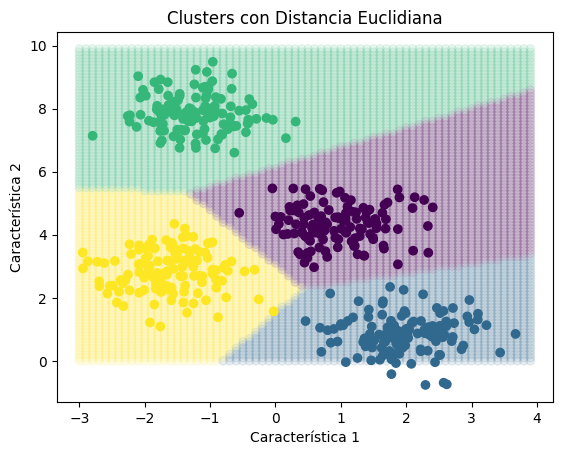

In [10]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generación de datos
X, y = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=0)

# Aplicación de K-Means con distancia Euclidiana
kmeans = KMeans(n_clusters=4)
y_kmeans = kmeans.fit_predict(X)

## Dibujemos los rangos de clusterización

x_range=np.arange(-3,4,0.1)
y_range=np.arange(0,10,0.1)

xx,yy=np.meshgrid(x_range,y_range)

X_range=np.c_[xx.ravel(),yy.ravel()]

y_range=kmeans.predict(X_range)

# Visualización
plt.scatter(X_range[:,0],X_range[:,1],c=y_range,alpha=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.title('Clusters con Distancia Euclidiana')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

### 3.2.2 Distancia Manhattan

La distancia Manhattan permite la formación de clusters con formas más variadas, como rectángulos o cubos, debido a que mide la suma de diferencias absolutas en cada dimensión.

**Adaptación de K-Means:**

El algoritmo K-Means clásico utiliza la distancia Euclidiana. Para utilizar la distancia Manhattan, podemos emplear el algoritmo **K-Medoids**, que permite especificar la métrica de distancia.

**Ejemplo con K-Medoids:**

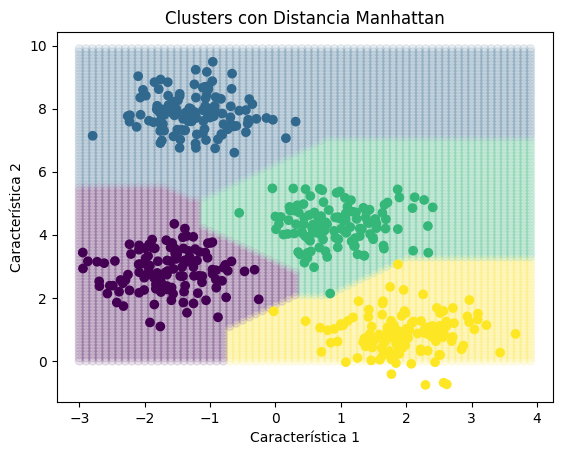

In [11]:
from sklearn_extra.cluster import KMedoids

# Aplicación de K-Medoids con distancia Manhattan
kmedoids = KMedoids(n_clusters=4, metric='manhattan')
y_kmedoids = kmedoids.fit_predict(X)

## Dibujemos los rangos de clusterización

x_range=np.arange(-3,4,0.1)
y_range=np.arange(0,10,0.1)

xx,yy=np.meshgrid(x_range,y_range)

X_range=np.c_[xx.ravel(),yy.ravel()]

y_range=kmedoids.predict(X_range)

# Visualización

plt.scatter(X_range[:,0],X_range[:,1],c=y_range,alpha=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y_kmedoids, cmap='viridis')
plt.title('Clusters con Distancia Manhattan')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()


## 3.3 Robustez a Valores Atípicos

Los valores atípicos pueden influir significativamente en el resultado del clustering, dependiendo de la métrica de distancia utilizada.

### 3.3.1 Distancia Euclidiana y Sensibilidad a Outliers

La distancia Euclidiana eleva las diferencias al cuadrado, lo que amplifica la influencia de grandes diferencias. Por lo tanto, los outliers pueden tener un impacto desproporcionado en la formación de clusters y en la posición de los centroides.

**Ejemplo:**

Consideremos un conjunto de datos donde la mayoría de los puntos están agrupados cerca del origen, pero hay un punto muy alejado (outlier).

**Código de Ejemplo:**


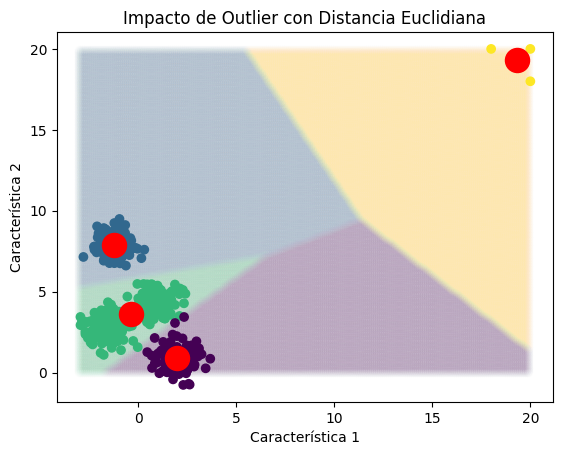

In [27]:
# Datos con un outlier
X_outlier = np.concatenate([X, [[20, 20]]])
X_outlier = np.concatenate([X_outlier, [[18, 20]]])
X_outlier = np.concatenate([X_outlier, [[20, 18]]])

# Aplicación de K-Means
kmeans = KMeans(n_clusters=4)
y_kmeans_outlier = kmeans.fit_predict(X_outlier)


## Dibujemos los rangos de clusterización

x_range=np.arange(-3,20,0.1)
y_range=np.arange(0,20,0.1)

xx,yy=np.meshgrid(x_range,y_range)

X_range=np.c_[xx.ravel(),yy.ravel()]

y_range=kmeans.predict(X_range)
plt.scatter(X_range[:,0],X_range[:,1],c=y_range,alpha=0.01)

# Visualización
plt.scatter(X_outlier[:, 0], X_outlier[:, 1], c=y_kmeans_outlier, cmap='viridis')
### Centroides
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('Impacto de Outlier con Distancia Euclidiana')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

**Observación:**

El centroide del cluster puede desplazarse hacia el outlier, afectando la asignación de los demás puntos.

### 3.3.2 Distancia Manhattan y Robustez

La distancia Manhattan es más robusta ante valores atípicos, ya que las diferencias no se elevan al cuadrado. Las diferencias grandes no se amplifican tanto como en la distancia Euclidiana.

**Aplicación con K-Medoids:**


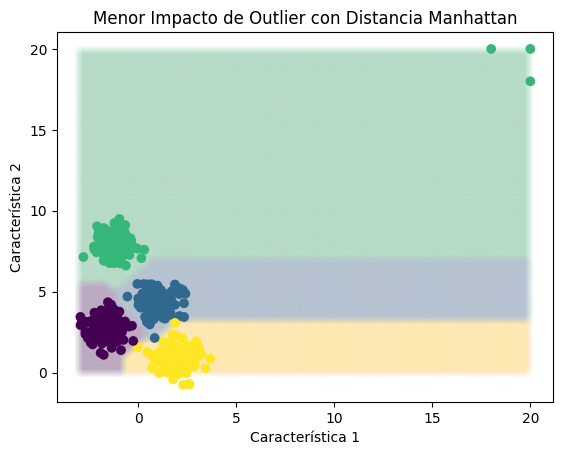

In [29]:

# Aplicación de K-Medoids con distancia Manhattan
kmedoids = KMedoids(n_clusters=4, metric='manhattan')
y_kmedoids_outlier = kmedoids.fit_predict(X_outlier)




## Dibujemos los rangos de clusterización

x_range=np.arange(-3,20,0.1)
y_range=np.arange(0,20,0.1)

xx,yy=np.meshgrid(x_range,y_range)

X_range=np.c_[xx.ravel(),yy.ravel()]

y_range=kmedoids.predict(X_range)
plt.scatter(X_range[:,0],X_range[:,1],c=y_range,alpha=0.01)

# Visualización
plt.scatter(X_outlier[:, 0], X_outlier[:, 1], c=y_kmedoids_outlier, cmap='viridis')
plt.title('Menor Impacto de Outlier con Distancia Manhattan')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

**Observación:**

El impacto del outlier es menor, y los clusters resultantes son más representativos de la distribución principal de los datos.

### 3.3.3 Técnicas para Manejar Outliers

Además de elegir una métrica de distancia más robusta, se pueden aplicar otras técnicas:

- **Detección y Eliminación de Outliers:**

  - **Métodos Estadísticos:** Usar el rango intercuartílico (IQR) o desviación estándar para identificar outliers.
  
  - **Ejemplo:**

In [14]:
from scipy import stats

z_scores = np.abs(stats.zscore(X))
filtered_entries = (z_scores < 3).all(axis=1)
X_filtered = X[filtered_entries]

- **Algoritmos Basados en Densidad:**

  - **DBSCAN:** Detecta puntos que no pertenecen a ninguna región de alta densidad y los clasifica como ruido.


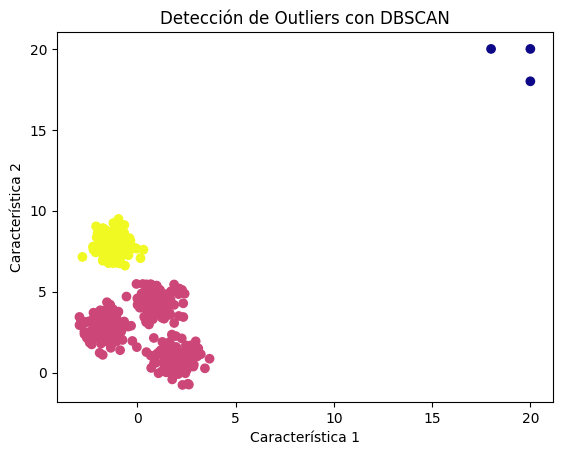

In [32]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1, min_samples=10)
labels_dbscan = dbscan.fit_predict(X_outlier)

plt.scatter(X_outlier[:, 0], X_outlier[:, 1], c=labels_dbscan, cmap='plasma')
plt.title('Detección de Outliers con DBSCAN')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

**Ventajas de Manejar Outliers:**

- Mejora la calidad de los clusters.
- Evita que los outliers distorsionen la estructura subyacente de los datos.


## 3.4 Efecto de la Dimensionalidad en la Distancia

### 3.4.1 Maldición de la Dimensionalidad

En espacios de alta dimensión, las distancias pueden volverse menos significativas, ya que todos los puntos tienden a estar aproximadamente a la misma distancia unos de otros.

**Explicación:**

- **Concentración de la Distancia:** A medida que aumenta la dimensionalidad, la distancia promedio entre puntos aumenta, y la variación relativa de las distancias disminuye.
  
- **Impacto en Clustering:** Los algoritmos basados en distancia pueden perder efectividad porque la noción de "cercanía" se diluye.

**Demostración:**

Consideremos puntos generados aleatoriamente en un hipercubo unitario en diferentes dimensiones.

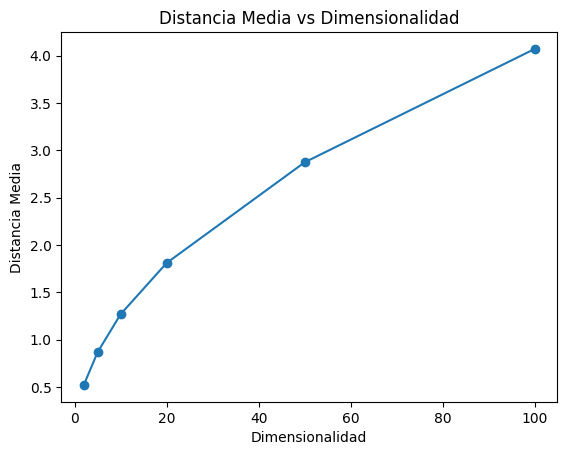

In [16]:
from scipy.spatial.distance import pdist
dims = [2, 5, 10, 20, 50, 100]
avg_distances = []

for dim in dims:
    X = np.random.random((1000, dim))
    dists = pdist(X, 'euclidean')
    avg_distances.append(np.mean(dists))

plt.plot(dims, avg_distances, marker='o')
plt.title('Distancia Media vs Dimensionalidad')
plt.xlabel('Dimensionalidad')
plt.ylabel('Distancia Media')
plt.show()


**Observación:**

La distancia media aumenta con la dimensionalidad, lo que puede afectar la capacidad de los algoritmos para distinguir entre puntos cercanos y lejanos.

### 3.4.2 Soluciones

- **Reducción de Dimensionalidad:**

  - **Análisis de Componentes Principales (PCA):** Proyecta los datos en un espacio de menor dimensión preservando la mayor varianza posible.


In [17]:
from sklearn.decomposition import PCA

X_high_dim = np.random.random((1000, 100))
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_high_dim)

- **Selección de Características:**

  - **Métodos Basados en Importancia:** Usar modelos como árboles de decisión para evaluar la importancia de las características y seleccionar las más relevantes.

- **Utilizar Métricas Adaptadas:**

  - **Distancia Mahalanobis:** Tiene en cuenta la correlación entre variables y escala los datos en consecuencia.

    $$
    d(\mathbf{x}, \mathbf{y}) = \sqrt{(\mathbf{x} - \mathbf{y})^T \mathbf{S}^{-1} (\mathbf{x} - \mathbf{y})}
    $$

    Donde $ \mathbf{S} $ es la matriz de covarianza de los datos.

    **Ejemplo:**

In [18]:
from scipy.spatial.distance import mahalanobis
import numpy as np

# Supongamos que 'X' es nuestro conjunto de datos
VI = np.linalg.inv(np.cov(X.T))
d = mahalanobis(X[0], X[1], VI)

## 3.5 Distancias Basadas en Correlación

En ciertos contextos, especialmente cuando las variables están correlacionadas o cuando la magnitud no es relevante, las distancias basadas en correlación pueden ser más adecuadas.

### 3.5.1 Distancia Coseno

Mide el ángulo entre dos vectores, ignorando la magnitud:

$$
d_{\text{coseno}}(\mathbf{x}, \mathbf{y}) = 1 - \frac{\mathbf{x} \cdot \mathbf{y}}{\|\mathbf{x}\| \|\mathbf{y}\|}
$$

- **Aplicaciones:** Procesamiento de texto, análisis de documentos, sistemas de recomendación.

**Ejemplo en Python:**

/tmp/ipykernel_51996/1444371298.py:11: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(dist_matrix, 'complete')


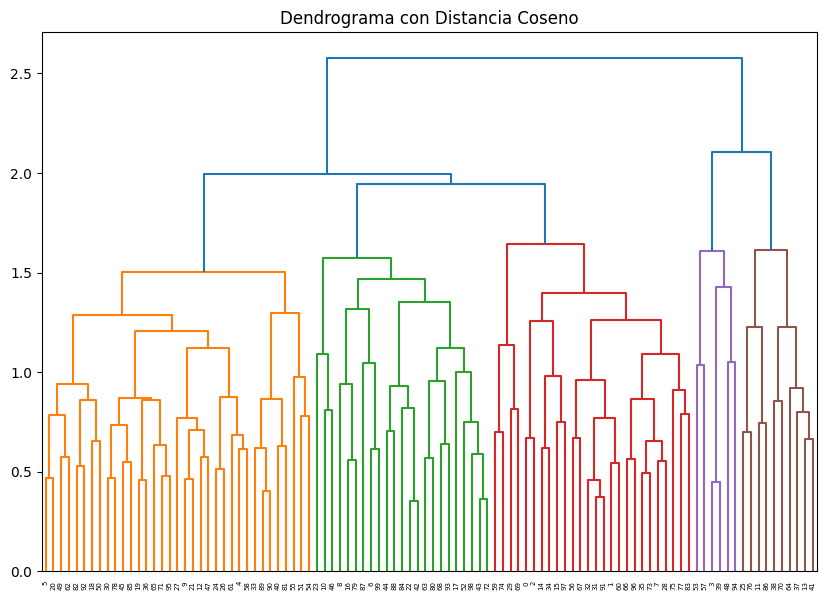

In [33]:
from sklearn.metrics.pairwise import cosine_distances

X= np.random.random((100, 10))

# Supongamos que 'X' es una matriz de características
dist_matrix = cosine_distances(X)

# Aplicación de clustering jerárquico
from scipy.cluster.hierarchy import linkage, dendrogram

linked = linkage(dist_matrix, 'complete')

plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrograma con Distancia Coseno')
plt.show()


### 3.5.2 Distancia Correlacional de Pearson

Mide la disimilitud basada en el coeficiente de correlación de Pearson:

$$
d_{\text{Pearson}}(\mathbf{x}, \mathbf{y}) = 1 - \text{corr}(\mathbf{x}, \mathbf{y})
$$

- **Aplicaciones:** Análisis de series temporales, bioinformática.

**Ejemplo en Python:**

/tmp/ipykernel_51996/2957022282.py:7: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(dist_matrix, 'average')


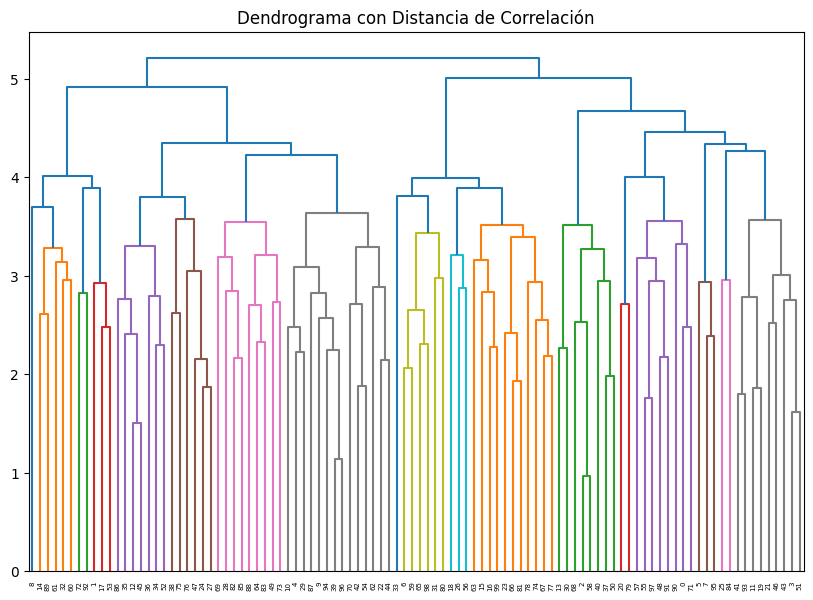

In [20]:
from scipy.spatial.distance import pdist, squareform

# Cálculo de la matriz de distancias
dist_matrix = squareform(pdist(X, metric='correlation'))

# Aplicación de clustering
linked = linkage(dist_matrix, 'average')

plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrograma con Distancia de Correlación')
plt.show()

## 3.6 Resumen de Impactos por Métrica

| **Métrica**            | **Sensibilidad a Escala** | **Forma de Clusters** | **Robustez a Outliers** | **Aplicaciones Comunes**                 |
|------------------------|---------------------------|-----------------------|-------------------------|------------------------------------------|
| Distancia Euclidiana   | Alta                      | Esférica              | Baja                    | K-Means, clustering jerárquico           |
| Distancia Manhattan    | Alta                      | Cuadrada              | Media                   | K-Medoids, análisis de rutas             |
| Distancia Coseno       | Baja (magnitud)           | N/A                   | Alta                    | Procesamiento de texto, sistemas de recomendación |
| Distancia Correlacional| Baja (escala y magnitud)  | N/A                   | Media                   | Series temporales, bioinformática        |
| Distancia Mahalanobis  | Baja (covarianza)         | Elíptica              | Media                   | Datos correlacionados, detección de outliers |

## 3.7 Consideraciones Prácticas

### 3.7.1 Comprender los Datos

Es fundamental analizar las características de los datos:

- **Distribución de las Variables:** Identificar si hay variables con distribuciones sesgadas o con escalas muy diferentes.

- **Correlación entre Variables:** Variables altamente correlacionadas pueden influir en la elección de la métrica.

### 3.7.2 Experimentación y Validación

- **Probar Diferentes Métricas:** Evaluar el desempeño del clustering con distintas métricas.

- **Utilizar Métricas de Validación:**

  - **Coeficiente de Silueta:**
  
  El coeficiente de silueta mide la cohesión y la separación de los clusters, proporcionando una medida de la calidad del clustering. Un valor alto indica clusters bien definidos.

  $$ \text{Silueta} = \frac{b - a}{\max(a, b)} $$

  Donde $ a $ es la distancia promedio al cluster más cercano y $ b $ es la distancia promedio al cluster más cercano distinto. El coeficiente varía entre -1 y 1.


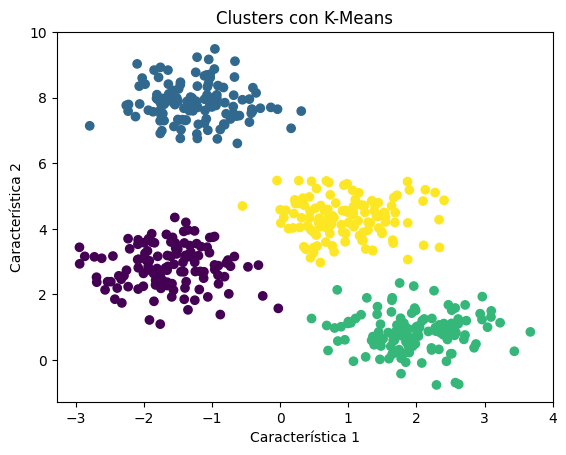

Coeficiente de Silueta (Euclidiana): 0.6844837346859131
Coeficiente de Silueta (Manhattan): 0.6848121435425115


In [35]:
from sklearn.metrics import silhouette_score

X, y = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=0,n_features=2)

kmeans = KMeans(n_clusters=4)
labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Clusters con K-Means')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()


score = silhouette_score(X, labels, metric='euclidean')
print(f'Coeficiente de Silueta (Euclidiana): {score}')

score = silhouette_score(X, labels, metric='manhattan')
print(f'Coeficiente de Silueta (Manhattan): {score}')

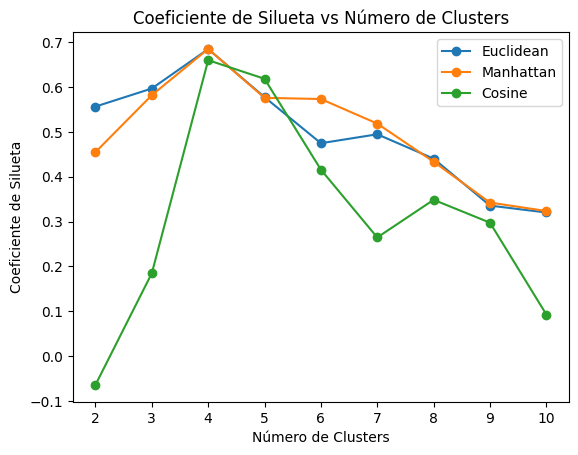

In [22]:
# Usemos el coeficiente de silueta para encontrar el número óptimo de clusters

silhouette_scores_euclidean = []
silhouette_scores_manhattan = []
silhouette_scores_cosine = []

distance=['euclidean','manhattan','cosine']
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    labels_euclidean = kmeans.fit_predict(X)
    labels_manhattan = kmeans.fit_predict(X)
    labels_cosine = kmeans.fit_predict(X)
    
    silhouette_scores_euclidean.append(silhouette_score(X, labels_euclidean, metric='euclidean'))
    silhouette_scores_manhattan.append(silhouette_score(X, labels_manhattan, metric='manhattan'))
    silhouette_scores_cosine.append(silhouette_score(X, labels_cosine, metric='cosine'))

plt.plot(k_values, silhouette_scores_euclidean, marker='o', label='Euclidean')
plt.plot(k_values, silhouette_scores_manhattan, marker='o', label='Manhattan')
plt.plot(k_values, silhouette_scores_cosine, marker='o', label='Cosine')
plt.title('Coeficiente de Silueta vs Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silueta')
plt.legend()
plt.show()


**Índice de Davies-Bouldin:**

El indice de Davies-Bouldin mide la similitud promedio entre cada cluster y el cluster más similar, contrastado con la similitud promedio entre los puntos de datos del mismo cluster.

$$
DB = \frac{1}{k} \sum_{i=1}^{k} \max_{j \neq i} \left( \frac{\sigma_i + \sigma_j}{d(c_i, c_j)} \right)
$$

In [23]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(X, labels)
print(f'Índice de Davies-Bouldin: {db_score}')

Índice de Davies-Bouldin: 0.44233638999749825


El indice de Davies-Bouldin varía entre 0 y $\infty$, donde valores más bajos indican clusters más separados.



## Resumen de Impactos por Métrica

| **Métrica**            | **Sensibilidad a Escala** | **Forma de Clusters** | **Robustez a Outliers** | **Aplicaciones Comunes**                 |
|------------------------|---------------------------|-----------------------|-------------------------|------------------------------------------|
| Distancia Euclidiana   | Alta                      | Esférica              | Baja                    | K-Means, clustering jerárquico           |
| Distancia Manhattan    | Alta                      | Cuadrada              | Media                   | K-Medoids, análisis de rutas             |
| Distancia Coseno       | Baja (magnitud)           | N/A                   | Alta                    | Procesamiento de texto, sistemas de recomendación |
| Distancia Correlacional| Baja (escala y magnitud)  | N/A                   | Media                   | Series temporales, bioinformática        |
| Distancia Mahalanobis  | Baja (covarianza)         | Elíptica              | Media                   | Datos correlacionados, detección de outliers |

**Métodos de Clustering**

---

### **Introducción**

El clustering es una técnica de aprendizaje no supervisado en Machine Learning que agrupa datos sin etiquetas en grupos (clusters) basados en similitudes intrínsecas. El objetivo es que los datos dentro de un mismo cluster sean más similares entre sí que a los de otros clusters.

---

### **Métodos de Clustering Comunes**

#### **1. K-Means Clustering**

- **Explicación Intuitiva**: Divide los datos en *K* clusters, donde cada punto pertenece al cluster con el centroide más cercano.

- **Trasfondo Matemático**:
  - **Función Objetivo**: Minimizar la suma de las distancias al cuadrado entre los puntos y el centroide de su cluster.
  - **Algoritmo**:
    1. **Inicialización**: Seleccionar *K* centroides iniciales (pueden ser aleatorios).
    2. **Asignación de Clusters**: Asignar cada punto al centroide más cercano (usualmente utilizando la distancia Euclidiana).
    3. **Actualización de Centroides**: Recalcular la posición de cada centroide como la media de los puntos asignados a ese cluster.
    4. **Convergencia**: Repetir los pasos 2 y 3 hasta que las asignaciones no cambien o se alcance un número máximo de iteraciones.

#### **2. Clustering Jerárquico**

- **Explicación Intuitiva**: Crea una jerarquía de clusters que pueden visualizarse en un dendrograma, agrupando o dividiendo los datos en niveles.

- **Trasfondo Matemático**:
  - **Tipos**:
    - **Aglomerativo** (Ascendente): Comienza con cada punto como un cluster individual y fusiona los clusters más cercanos.
    - **Divisivo** (Descendente): Comienza con todos los puntos en un solo cluster y los divide iterativamente.
  - **Distancias entre Clusters**:
    - **Single Linkage**: Distancia mínima entre puntos de dos clusters.
    - **Complete Linkage**: Distancia máxima entre puntos de dos clusters.
    - **Average Linkage**: Promedio de distancias entre todos los pares de puntos de dos clusters.

#### **3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

- **Explicación Intuitiva**: Identifica clusters basados en áreas de alta densidad separadas por áreas de baja densidad.

- **Trasfondo Matemático**:
  - **Parámetros Clave**:
    - **ε (epsilon)**: Radio de vecindad para considerar puntos vecinos.
    - **MinPts**: Número mínimo de puntos requeridos para formar un cluster denso.
  - **Tipos de Puntos**:
    - **Puntos Core**: Tienen al menos MinPts en su vecindad ε.
    - **Puntos Border**: No son puntos core pero están en la vecindad de un punto core.
    - **Puntos Ruido**: No son ni core ni border.
  - **Algoritmo**:
    1. Seleccionar un punto no visitado y recupera su vecindad.
    2. Si es un punto core, se crea un nuevo cluster.
    3. Expandir el cluster agregando puntos core y border conectados.
    4. Repetir hasta que todos los puntos estén asignados o marcados como ruido.

---

### **Código de Prueba en Python**

A continuación, se presenta un ejemplo utilizando K-Means con scikit-learn.

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generar datos de ejemplo
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

# Visualizar los datos
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('Datos Originales')
plt.show()

# Aplicar K-Means
kmeans = KMeans(n_clusters=4, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Visualizar los clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.title('Clusters Identificados por K-Means')

# Marcar los centroides
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.show()
```

**Explicación del Código**:

- **Generación de Datos**: Se crean 300 muestras distribuidas en 4 centros utilizando `make_blobs`.
- **Visualización Inicial**: Se muestra un gráfico de dispersión de los datos originales.
- **Aplicación de K-Means**:
  - Se crea una instancia de `KMeans` especificando 4 clusters.
  - El método `fit_predict` ajusta el modelo y predice las etiquetas de cluster para cada punto.
- **Visualización de Resultados**:
  - Se grafica cada punto coloreado según su cluster asignado.
  - Los centroides se marcan con una 'X' roja para distinguirlos.

---

### **Conclusión**

Los métodos de clustering son esenciales para explorar y entender conjuntos de datos sin etiquetas. La elección del método adecuado depende de la naturaleza de los datos y del propósito del análisis:

- **K-Means** es eficiente para clusters esféricos y de tamaño similar.
- **Clustering Jerárquico** proporciona una visión multinivel de la estructura de los datos.
- **DBSCAN** es útil para detectar clusters de forma arbitraria y manejar ruido.

---

**Referencias**

- **Scikit-learn Documentation**: [Clustering](https://scikit-learn.org/stable/modules/clustering.html)
- **Libro**: *An Introduction to Statistical Learning* - Capítulo sobre aprendizaje no supervisado.